# Quantum Fourier Transform

### **Victor Onofre**

Application of the Quantum Fourier Transform to the state $|1100>$ step by step.

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
import numpy as np 
import matplotlib

In [2]:
style = {'backgroundcolor': 'lightyellow'} # Style of the circuits
backend = BasicAer.get_backend('statevector_simulator')

The quantum fourier transform is a change of basis from the computational basis to the fourier basis.

$$\text{States in the computational basis are} \quad \Big\{|0>, |1> \Big\}$$

$$\Downarrow \quad \text{Change of basis}$$

$$\text{States in the fourier basis are} \quad \Big\{ |+>, |-> \Big\}$$

$$|+> = \frac{1}{\sqrt{2}} \Big(|0> + |1> \Big) \quad |-> = \frac{1}{\sqrt{2}} \Big(|0> - |1> \Big)$$

$$ | \widetilde{x} > = QFT |x> = \frac{1}{\sqrt{N}} \sum_{y=0}^{N} e^{ \frac{2 \pi i x y}{N}} |y>  \quad N = 2^{n}$$

$$ |x> = |x_{1}> \otimes |x_{2}> \otimes...\otimes |x_{n}>  $$

$$ QFT|x> = \frac{1}{\sqrt{N}} \Big( |0> + e^{\frac{2\pi i x}{2}} |1> \Big) \otimes \Big( |0> + e^{\frac{2\pi i x}{2^{2}}} |1> \Big) \otimes... \otimes \Big( |0> + e^{\frac{2\pi i x}{2^{n}}} |1> \Big)$$

Each state has the transformation:  $|x_{k}> \rightarrow \Big( |0> + e^{\frac{2\pi i x}{2^{k}}} |1> \Big)  $

In [3]:
qreg = QuantumRegister(4)
register1 = ClassicalRegister(4)
qc = QuantumCircuit(qreg,register1)

# Initial state

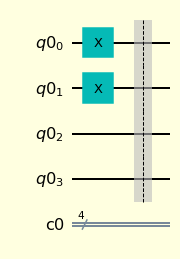

In [4]:
qc.x(0)
qc.x(1)
qc.barrier()
qc.draw(output='mpl', style=style) 

$$ |\psi_{0}> = X_{0}X_{1}|0>_{0} |0>_{1} |0>_{2} |0>_{3} = |1>_{0} |1>_{1} |0>_{2} |0>_{3} $$

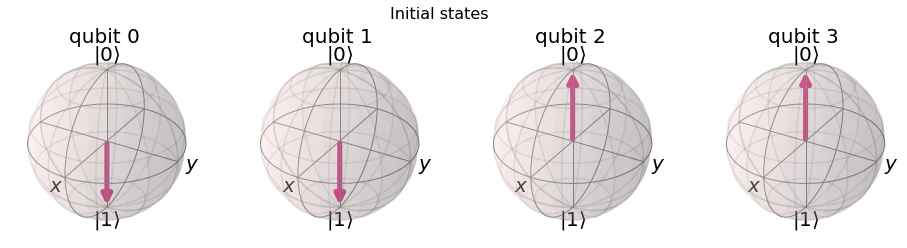

In [5]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state, title='Initial states')

$$|\psi_{0} > = |1>|1>|0>|0> $$

# Part I

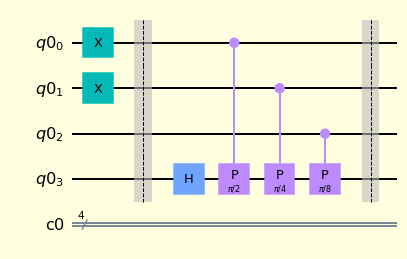

In [6]:
qc.h(3)
qc.cp(np.pi/2,0,3)
qc.cp(np.pi/4,1,3)
qc.cp(np.pi/8,2,3)
qc.barrier()
qc.draw(output='mpl', style=style) 

The $CP(\theta)$ perform a phase rotation if both qubits are in the $|11 >$ state. With the matrix representation: 

$$CP(\theta) = \begin{bmatrix}1 & 0 & 0 & 0 \\ 
                              0 & 1 & 0 & 0\\ 
                              0 & 0 & 1 & 0\\
                              0 & 0 & 0 & e^{i\theta}\end{bmatrix}$$

$$|\psi_{1} > = \Big( CP(\pi/8)_{23} \Big)   \Big( CP(\pi/4)_{13} \Big)   \Big( CP(\pi/2)_{03} \Big) H_{3}|\psi_{0}> = \Big( CP(\pi/8)_{23} \Big)   \Big( CP(\pi/4)_{13} \Big)   \Big( CP(\pi/2)_{03} \Big) H_{3} |1>_{0}|1>_{1}|0>_{2}|0>_{3} $$

### Step 1: Apply the hadmard gate to $|0>_{3}$

$$ |\psi_{1} > =  \Big( CP(\pi/8)_{23} \Big)   \Big( CP(\pi/4)_{13} \Big)   \Big( CP(\pi/2)_{03} \Big) |1>_{0} |1>_{1}|0>_{2}  \frac{1}{\sqrt{2}} \Big( |0>_{3} + |1>_{3} \Big) $$

$$ |\psi_{1} > =   \frac{1}{\sqrt{2}} \Big( CP(\pi/8)_{23} \Big)   \Big( CP(\pi/4)_{13} \Big)   \Big( CP(\pi/2)_{03} \Big) \Big( |0>_{3}|1>_{0} + |1>_{3}|1>_{0} \Big) |1>_{1}|0>_{2}  $$

### Step 2: Apply the CP gate with $\theta = \pi/2$ to qubit $3$ and $0$
Both states need to be $1$ to apply the phase $e^{i\theta}$

$$ |\psi_{1} > =   \frac{1}{\sqrt{2}} \Big( CP(\pi/8)_{23} \Big)   \Big( CP(\pi/4)_{13} \Big)  \Big( |0>_{3}|1>_{0} + |1>_{3} e^{i\pi/2}|1>_{0} \Big) |1>_{1}|0>_{2}  $$

$$ |\psi_{1} > =   \frac{1}{\sqrt{2}} \Big( CP(\pi/8)_{23} \Big)   \Big( CP(\pi/4)_{13} \Big)  \Big( |0>_{3}|1>_{0} |1>_{1} + |1>_{3} e^{i\pi/2}|1>_{0}  |1>_{1} \Big) |0>_{2}  $$

### Step 3: Apply the CP gate with $\theta = \pi/4$ to qubit $3$ and $1$

$$ |\psi_{1} > =   \frac{1}{\sqrt{2}} \Big( CP(\pi/8)_{23} \Big)  \Big( |0>_{3}|1>_{0} |1>_{1} |0>_{2}+ |1>_{3} e^{i\pi/2}|1>_{0} e^{i\pi/4} |1>_{1} |0>_{2} \Big)   $$

### Step 4: Apply the CP gate with $\theta = \pi/8$ to qubit $3$ and $2$
In this case there are not states $|1>_{3} |1>_{2}$, so the phase is not apply

$$ |\psi_{1} > =  \frac{1}{\sqrt{2}}  \Big( |0>_{3}|1>_{0} |1>_{1} |0>_{2}+ |1>_{3} e^{i\pi/2}|1>_{0} e^{i\pi/4} |1>_{1}  |0>_{2} \Big)   $$

### Step 5: Final state for the first qubit

$$ |\psi_{1} > = \frac{1}{\sqrt{2}}   \Big( |0>_{3}+ e^{i (\pi/2 + \pi/4)} |1>_{3} \Big) |1>_{0} |1>_{1} |0>_{2}   $$

# Part II

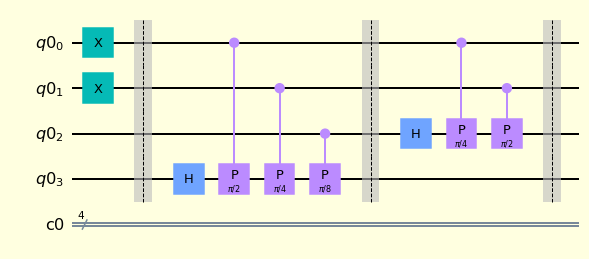

In [7]:
qc.h(2)
qc.cp(np.pi/4,0,2)
qc.cp(np.pi/2,1,2)
qc.barrier()
qc.draw(output='mpl', style=style) 

### Step 1: Apply the hadamard gate to $|0>_{2}$

$$ |\psi_{2} > = \Big( CP(\pi/4)_{12} \Big)   \Big( CP(\pi/2)_{02} \Big) H_{2} |\psi_{1} > = \frac{1}{\sqrt{2}} \Big( CP(\pi/4)_{12} \Big)   \Big( CP(\pi/2)_{02} \Big) H_{2}   \Big( |0>_{3}+e^{i (\pi/2 + \pi/4)} |1>_{3} \Big) |1>_{0} |1>_{1} |0>_{2}  $$

### Step 2: Apply the CP gate with $\theta = \pi/2$ to qubit $2$ and $0$ and with $\theta = \pi/4$ to qubit $2$ and $1$
Both states need to be $1$ to apply the phase $e^{i\theta}$

$$ |\psi_{2} > =   \frac{1}{\sqrt{2}}   \Big( |0>_{3}+ e^{i (\pi/2 + \pi/4 )} |1>_{3} \Big)\Big( CP(\pi/4)_{12} \Big)   \Big( CP(\pi/2)_{02} \Big)  \frac{1}{\sqrt{2}}  \Big( |0>_{2} + |1>_{2} \Big)  |1>_{0} |1>_{1}   $$

$$ |\psi_{2} > =   \frac{1}{2}   \Big( |0>_{3}+ e^{i (\pi/2 + \pi/4 )} |1>_{3} \Big) \Big( |0>_{2} +  e^{i (\pi/2 + \pi/4 )}  |1>_{2} \Big)  |1>_{0} |1>_{1}   $$

# Part III

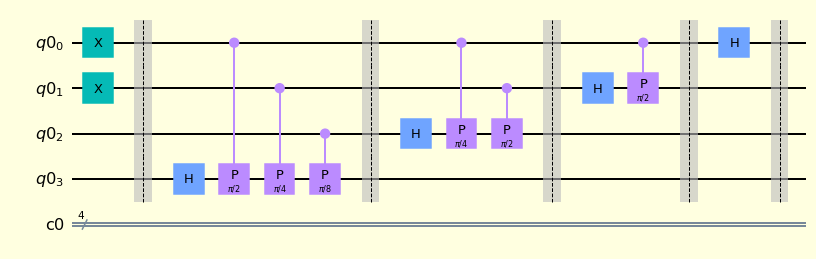

In [8]:
qc.h(1)
qc.cp(np.pi/2,0,1)
qc.barrier()
qc.h(0)
qc.barrier()
qc.draw(output='mpl', style=style) 

### Step 1: Apply the hadamard gate to $|1>_{1}$

$$  |\psi_{3} > =   \Big( CP(\pi/2)_{01} \Big) H_{1} |\psi_{2} > =    \frac{1}{2}   \Big( |0>_{3}+ e^{i (\pi/2 + \pi/4 )} |1>_{3} \Big) \Big( |0>_{2} +  e^{i (\pi/2 + \pi/4 )}  |1>_{2} \Big)  |1>_{0} \Big( CP(\pi/2)_{01} \Big) H_{1} |1>_{1}     $$

$$  |\psi_{3} > = \frac{1}{2} \Big( |0>_{3}+ e^{i (\pi/2 + \pi/4 )} |1>_{3} \Big) \Big( |0>_{2} +  e^{i (\pi/2 + \pi/4 )}  |1>_{2} \Big)   \Big( CP(\pi/2)_{23} \Big)  \frac{1}{\sqrt{2}}  \Big( |0>_{1} - |1>_{1} \Big) |1>_{0}   $$

### Step 2: Apply the CP gate with $\theta = \pi/2$ to qubit $3$ and $2$
Both states need to be $1$ to apply the phase $e^{i\theta}$

$$  |\psi_{3} > = \frac{1}{2}  \frac{1}{\sqrt{2}}   \Big( |0>_{3}+ e^{i (\pi/2 + \pi/4 )} |1>_{3} \Big) \Big( |0>_{2} +  e^{i (\pi/2 + \pi/4 )}  |1>_{2} \Big)   \Big( |0>_{1} - e^{i \pi/2} |1>_{1} \Big) |1>_{0}   $$

### Step 3: Apply the hadamard gate to $|1>_{0}$

$$  |\psi_{4} > =  H_{0}|\psi_{3} > = \frac{1}{2} \frac{1}{\sqrt{2}} \Big( |0>_{3}+ e^{i (\pi/2 + \pi/4 )} |1>_{3} \Big) \Big( |0>_{2} +  e^{i (\pi/2 + \pi/4 )}  |1>_{2} \Big)   \Big( |0>_{1} - e^{i \pi/2} |1>_{1} \Big)  H_{0}|1>_{0}   $$

$$  |\psi_{4} > =  \frac{1}{2} \frac{1}{\sqrt{2}}\Big( |0>_{3}+ e^{i (\pi/2 + \pi/4 )} |1>_{3} \Big) \Big( |0>_{2} +  e^{i (\pi/2 + \pi/4 )}  |1>_{2} \Big)   \Big( |0>_{1} - e^{i \pi/2} |1>_{1} \Big)  \frac{1}{\sqrt{2}}  \Big( |0>_{0} - |1>_{0} \Big) $$

$$  |\psi_{4} > =  \frac{1}{4} \Big( |0>_{3}+ e^{i (\pi/2 + \pi/4 )} |1>_{3} \Big) \Big( |0>_{2} +  e^{i (\pi/2 + \pi/4 )}  |1>_{2} \Big)   \Big( |0>_{1} - e^{i \pi/2} |1>_{1} \Big)  \Big( |0>_{0} - |1>_{0} \Big) $$

# Part IV

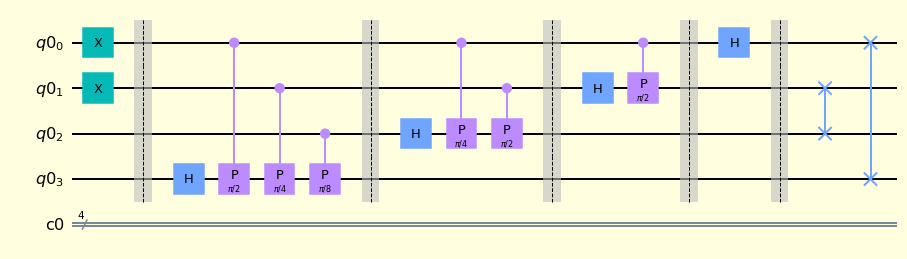

In [9]:
qc.swap(2,1)
qc.swap(3,0)
qc.draw(output='mpl', style=style) 

The SWAP gate exchanges the two qubits. It transforms the states as:

$$ |00> \rightarrow |00> \quad  |01> \rightarrow |10> \quad |10> \rightarrow |01> \quad |11> \rightarrow |11>$$

With the matrix representation: 
    
$$SWAP =      \begin{bmatrix}1 & 0 & 0 & 0 \\ 
                              0 & 0 & 1 & 0\\ 
                              0 & 1 & 0 & 0\\
                              0 & 0 & 0 & 1\end{bmatrix}$$

We apply the SWAP gate to the qubits $0 \rightarrow 3$ and  $1 \rightarrow 2$  .

$$  |\psi_{5} > = SWAP_{03}  SWAP_{12} |\psi_{4} > $$

$$  |\psi_{4} > =  \frac{1}{4} \Big( |0>_{0}+ e^{i (\pi/2 + \pi/4 )} |1>_{0} \Big) \Big( |0>_{1} +  e^{i (\pi/2 + \pi/4 )}  |1>_{1} \Big)   \Big( |0>_{2} - e^{i \pi/2} |1>_{2} \Big)  \Big( |0>_{3} - |1>_{3} \Big) $$

# Part V

We can visualize the quantum Fourier transform in the Bloch sphere

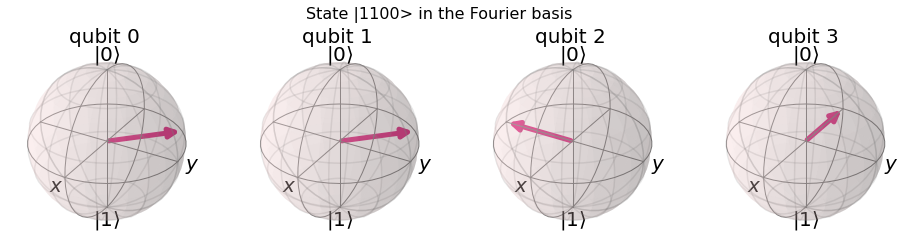

In [12]:
out_vector = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(out_vector, title='State |1100> in the Fourier basis')

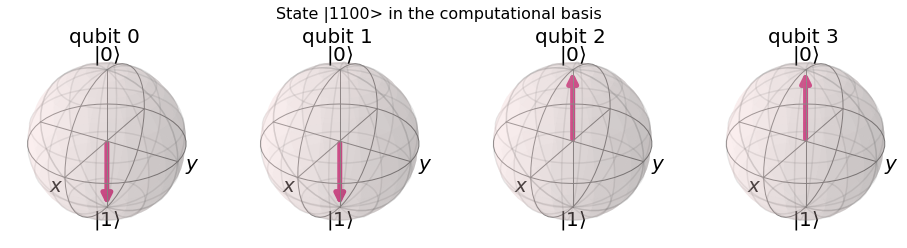

In [14]:
plot_bloch_multivector(state, title='State |1100> in the computational basis')

# Part VI

Putting all together in a function

In [16]:
## This funcions were taken from the Qiskit Textbook ##
#######################################################

def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(np.pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

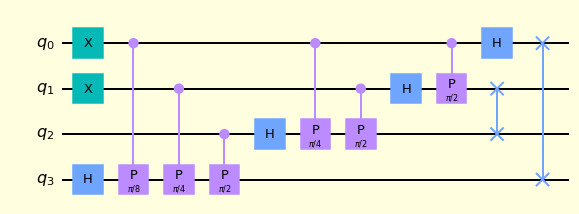

In [18]:
qc2 = QuantumCircuit(4)
qc2.x(0)
qc2.x(1)
qft(qc2,4)
qc2.draw(output='mpl', style=style) 

# **References**

[1] Mermin N.D., Quantum Computer Science: An Introduction, Cambridge University Press, 2007 
    
[2] https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html  